---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.13 - Customer Churn

### Imports and loading data

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

sns.set()

In [179]:
URL = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(URL, sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [180]:
description = pd.read_excel(URL, sheet_name='Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

- Number of total observations: 5630
- Missing values in some columns.
- Object data type columns (categorical).

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


We have to predict `Churn` column, it will be `labels`(predictors) for us:

In [6]:
churn_rate = df['Churn'].value_counts() / len(df) * 100
churn_rate

0    83.161634
1    16.838366
Name: Churn, dtype: float64

- 4682 customers repurchased (remain)
- 948 customers left (churn)

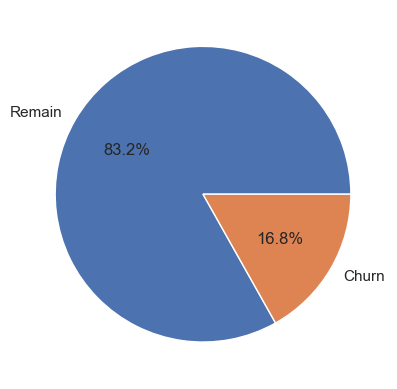

In [184]:
plt.pie(churn_rate, labels=['Remain', 'Churn'], autopct='%1.1f%%');

#### Analyzing some numeric columns

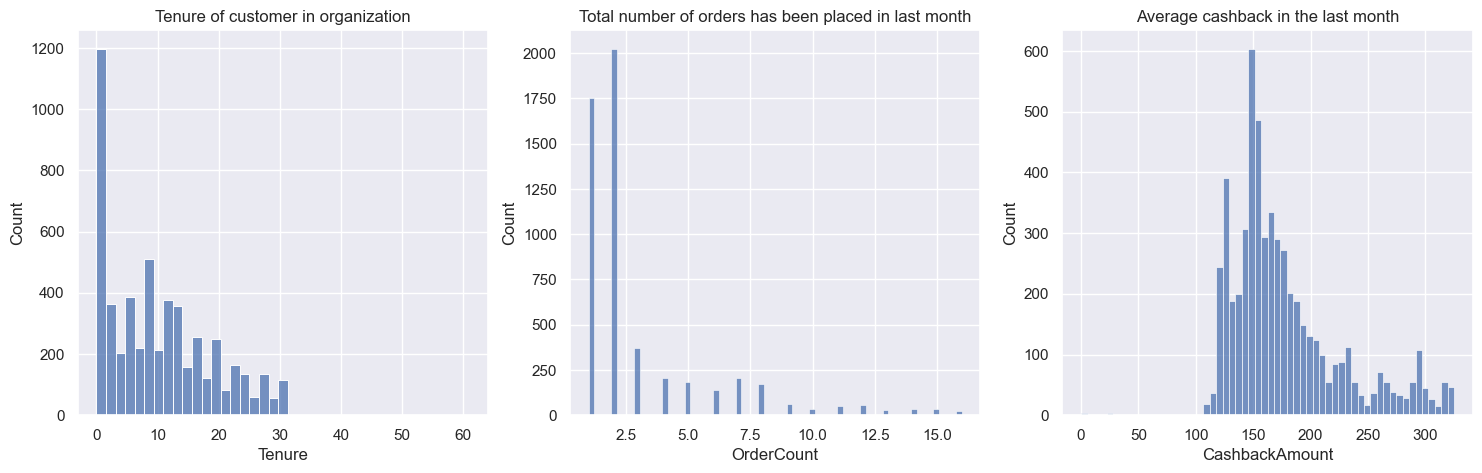

In [185]:
fig, axes = plt.subplots(1,3, figsize=[18, 5])

# Tenure
sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title("Tenure of customer in organization")

# OrderCount
sns.histplot(x='OrderCount', data=df, ax=axes[1])
axes[1].set_title("Total number of orders has been placed in last month")

# Cashback
sns.histplot(x='CashbackAmount', data=df, ax=axes[2])
axes[2].set_title("Average cashback in the last month")

plt.show()

#### Analyzing some categorical columns

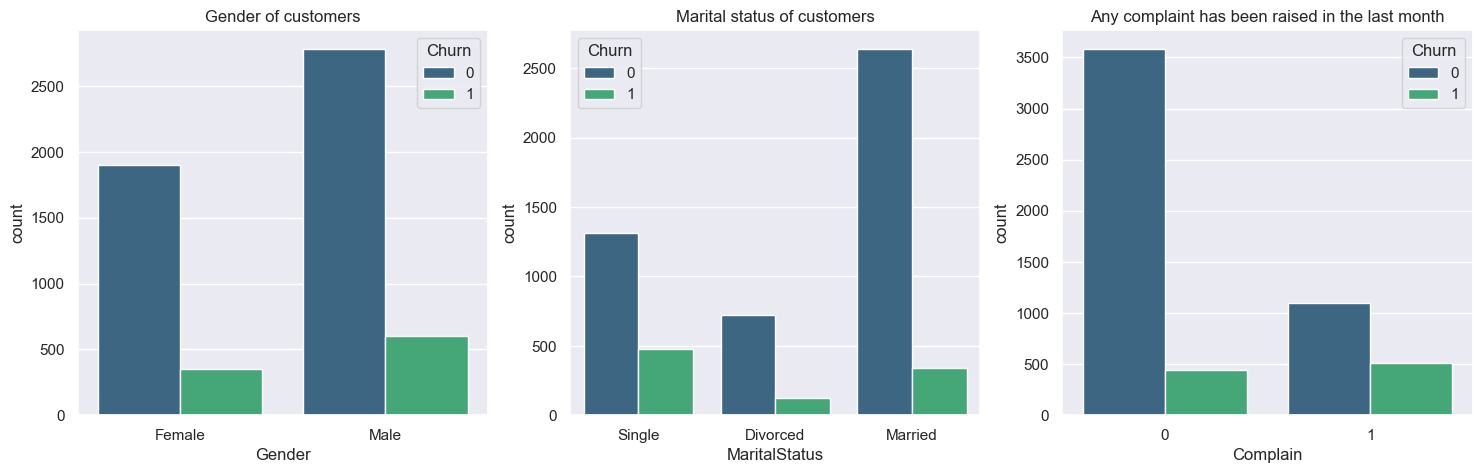

In [186]:
fig, axes = plt.subplots(1,3, figsize=[18, 5])

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Marital status of customers")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Any complaint has been raised in the last month")

plt.show()

In [151]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

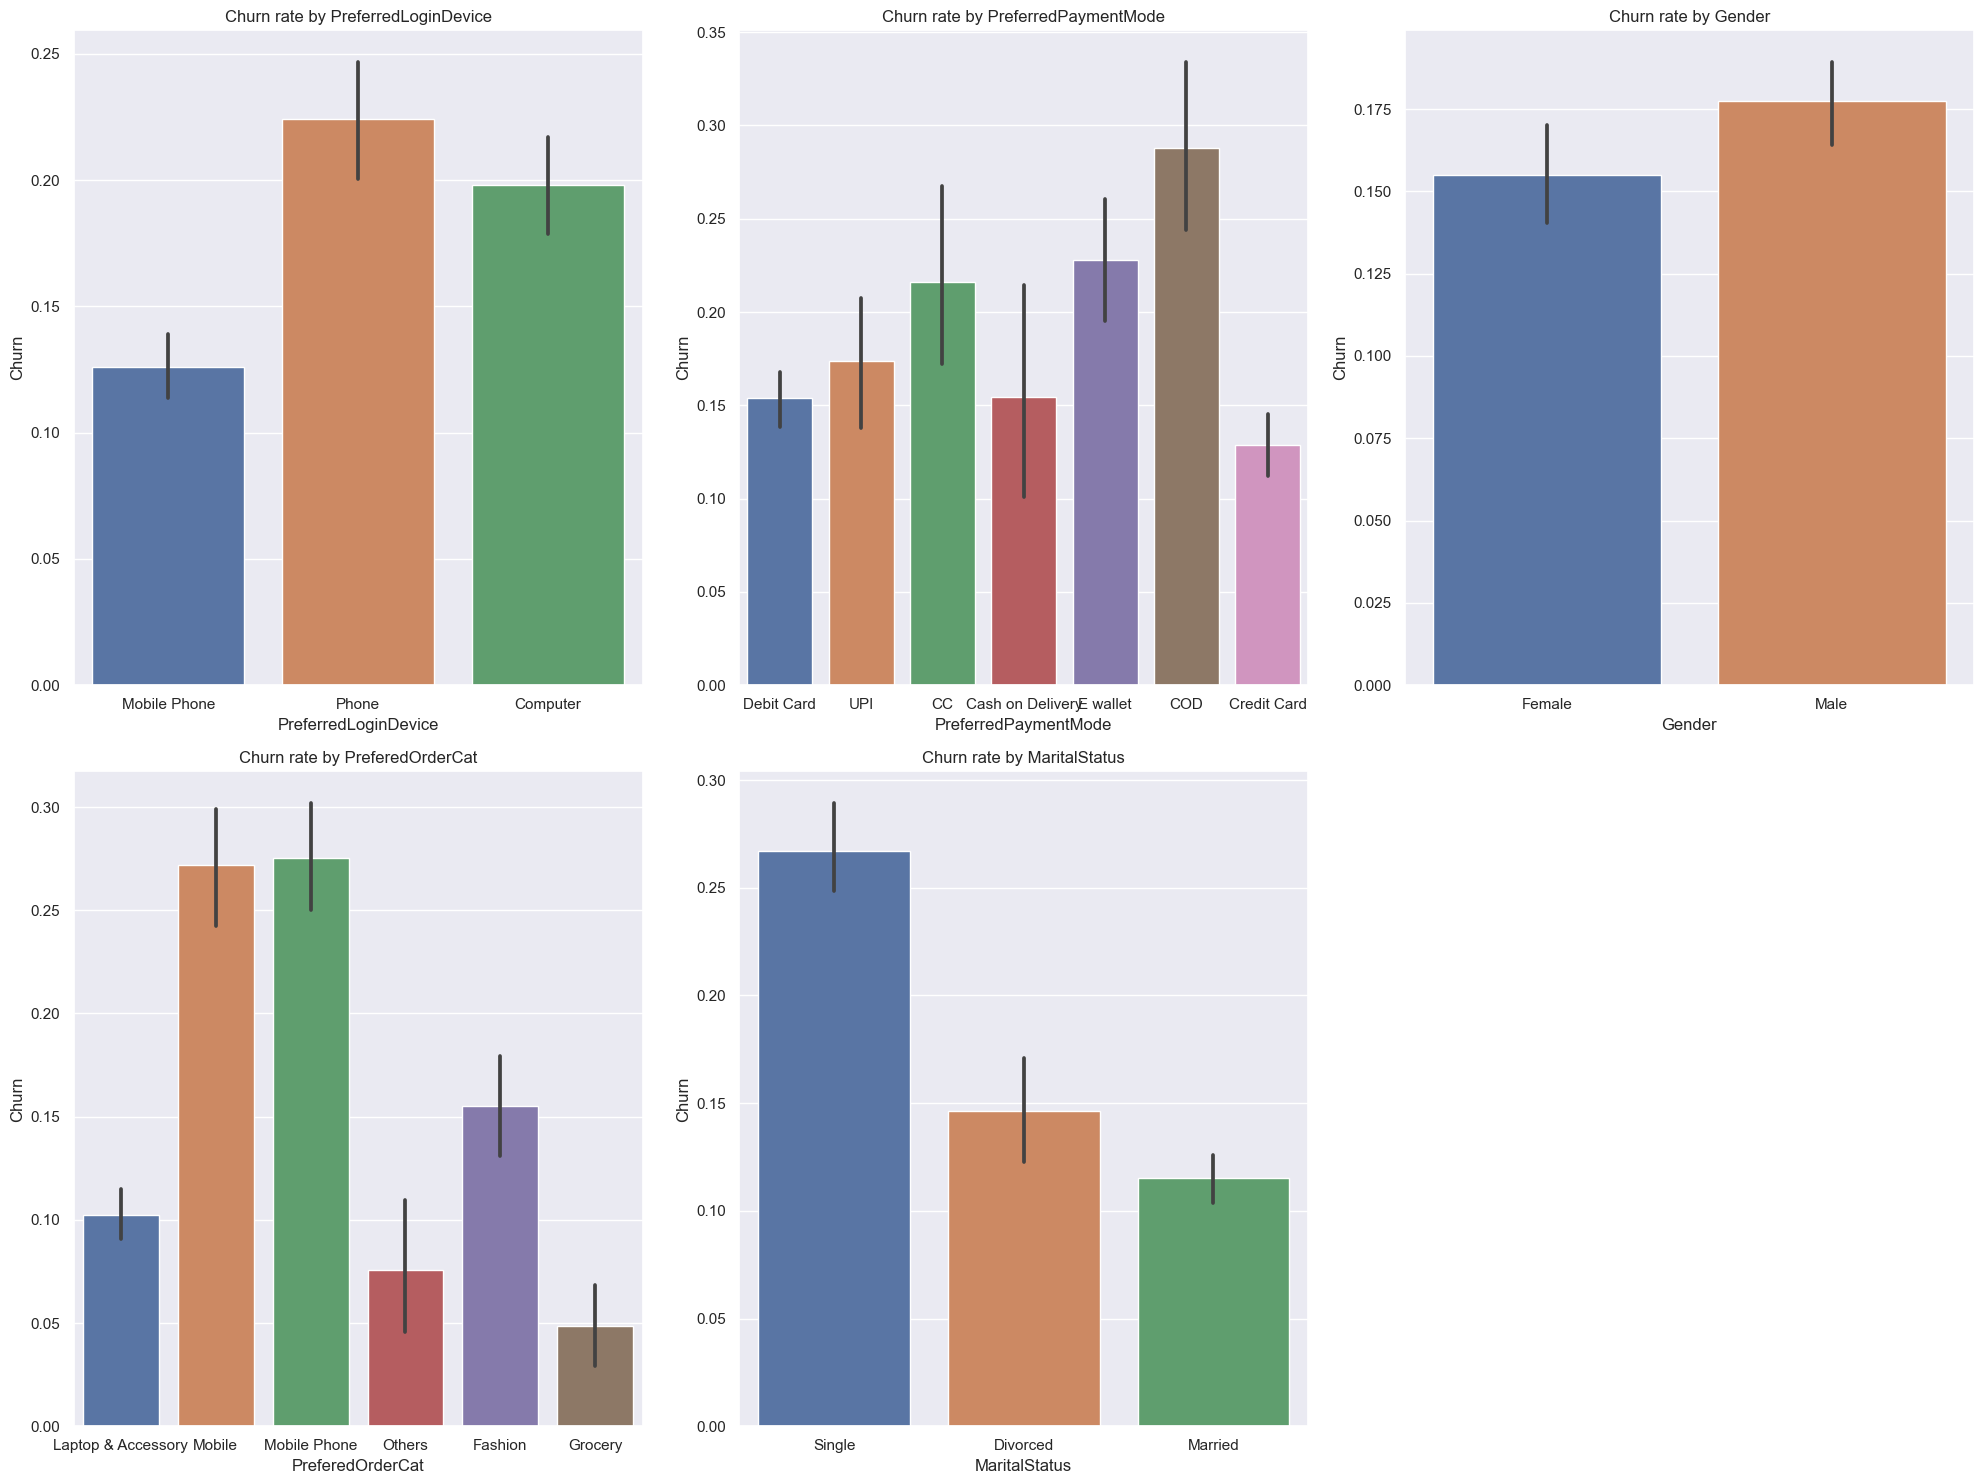

In [220]:
# Organize a list of categorical columns to visualize
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
                       'PreferedOrderCat', 'MaritalStatus']

# Create a figure with one subplot for each categorical column
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.delaxes(axes[1, 2])  # remove the last (empty) subplot
axes = axes.flatten()  # Flatten the axes array

# Loop over the categorical columns and create a bar plot for each one
for i, col in enumerate(categorical_columns):
    sns.barplot(x=col, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn rate by {col}')

plt.tight_layout()
plt.show()

### Data Preprocessing

In [11]:
missing_values = df.isnull().sum().sum()
print("Missing values:", missing_values)

missing_rows = df[df.isnull().any(axis=1)].shape[0]
print("Missing rows:", missing_rows)

missing_rows_ratio = np.round(missing_rows/len(df)*100)
print("Missing rows ratio:", missing_rows_ratio, "%")

Missing values: 1856
Missing rows: 1856
Missing rows ratio: 33.0 %


In [12]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

33% is too much. But do we need all the columns?

Let's sort some categorical columns with high correlation.

In [123]:
### TODO: add categorical columns to predictors which are correlated to Churn
corr_cols = ['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore']
data = df[corr_cols]

data.isnull().sum()

Tenure                      264
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
NumberOfDeviceRegistered      0
SatisfactionScore             0
dtype: int64

In [126]:
miss_vals = data[['Tenure', 'DaySinceLastOrder']].isnull().sum().sum()
print(f"Number of missing values: {miss_vals}")
print(f"Percentage of missing values: {miss_vals / len(data) * 100 :.1f} %")

Number of missing values: 571
Percentage of missing values: 10.1 %


In [127]:
data[['Tenure', 'DaySinceLastOrder']].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0


In [97]:
data[['Tenure', 'DaySinceLastOrder']].sample(10)

,Tenure,DaySinceLastOrder
3154,11.0,3.0
5026,14.0,1.0
509,0.0,3.0
891,NaN,0.0
4200,9.0,1.0
4156,13.0,NaN
4042,18.0,3.0
993,NaN,0.0
565,4.0,5.0
3867,24.0,12.0


**We fill `NaN` values with the `mean` values.**

In [221]:
miss_cols = ['Tenure', 'DaySinceLastOrder']
imputer = SimpleImputer(strategy='mean')

num_values = imputer.fit_transform(data[miss_cols])
data.loc[:, miss_cols] = pd.DataFrame(num_values, columns=miss_cols)

KeyError: "None of [Index(['Tenure', 'DaySinceLastOrder'], dtype='object')] are in the [columns]"

In [146]:
data.isnull().sum()

Tenure                      0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
NumberOfDeviceRegistered    0
SatisfactionScore           0
dtype: int64

In [149]:
data

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
0,4.000000,1,5.000000,159.93,3,2
1,10.189899,1,0.000000,120.90,4,3
2,10.189899,1,3.000000,120.28,4,3
3,0.000000,0,3.000000,134.07,4,5
4,0.000000,0,3.000000,129.60,3,5
...,...,...,...,...,...,...
5625,10.000000,0,4.000000,150.71,2,1
5626,13.000000,0,4.543491,224.91,5,5
5627,1.000000,1,4.000000,186.42,2,4
5628,23.000000,0,9.000000,178.90,5,4


### Machine Learning

### Evaluation

#### Cross-validation